In [1]:
import numpy as np
import pandas as pd
import gsw

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [3]:
data = pd.read_csv('../data/JOISS_data_preprocessing.csv', encoding = 'euc-kr')

In [4]:
ts = data[['Temperature [℃]', 'Salinity [PSU]']]

In [5]:
df = ts.sort_values('Temperature [℃]', ascending = True)

In [6]:
mint = np.min(df['Temperature [℃]'])
maxt = np.max(df['Temperature [℃]'])

In [7]:
mins = np.min(df['Salinity [PSU]'])
maxs = np.max(df['Salinity [PSU]'])

In [8]:
tempL = np.linspace(mint, maxt, 5218)

In [10]:
salL = np.linspace(mins, maxs, 5218)

In [11]:
Tg, Sg = np.meshgrid(tempL, salL)
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(), 5218)

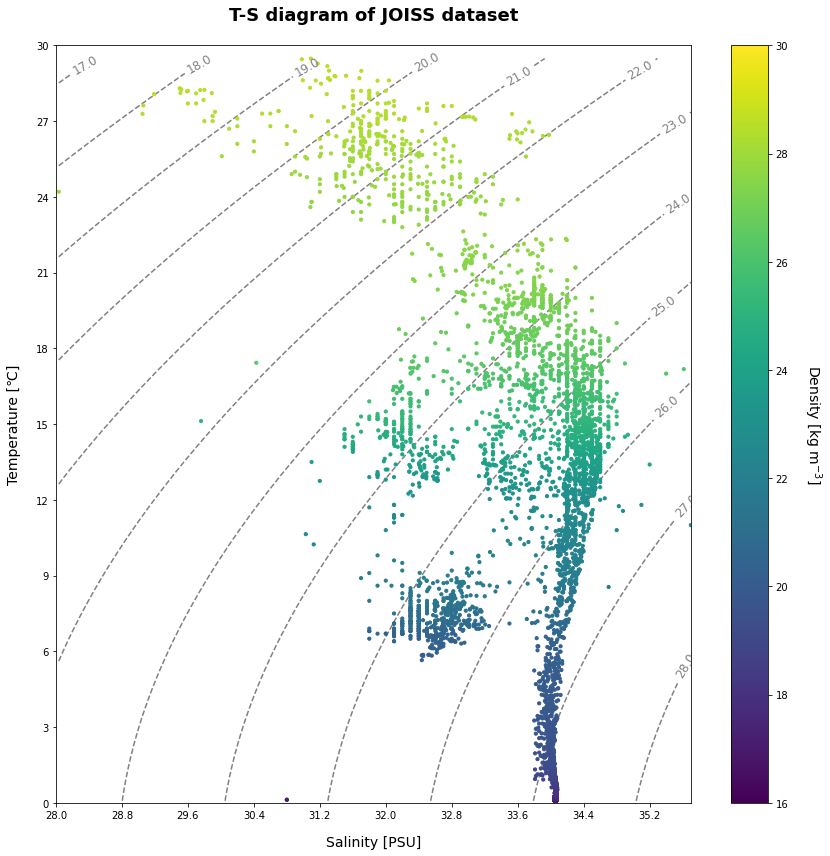

In [14]:
fig, ax = plt.subplots(figsize = (12,12))
cs = ax.contour(Sg, Tg, sigma_theta, linestyles = 'dashed', colors = 'grey', zorder = 1, levels = np.arange(16,30,1))
cl = plt.clabel(cs, fontsize = 12, inline = True, fmt = '%.1f')

sc = plt.scatter(df['Salinity [PSU]'], df['Temperature [℃]'], c=cnt, s=10)
cb = plt.colorbar(sc)

ax.set_xlabel("Salinity [PSU]", fontsize=14, labelpad=15)
ax.set_ylabel("Temperature [℃]", fontsize=14, labelpad=15)
ax.set_title('T-S diagram of JOISS dataset',fontsize=18, fontweight='bold', pad=25)

ax.xaxis.set_major_locator(MaxNLocator())
ax.yaxis.set_major_locator(MaxNLocator(nbins=10))
ax.tick_params(direction='out')

cb.ax.tick_params(direction='out')
cb.set_label("Density [kg m$^{-3}$]", fontsize=14, rotation=270, labelpad=35)
plt.clim(16, 30)

plt.tight_layout()
plt.xlim([28,35.7])
plt.ylim([0,30])
plt.savefig('ts_diagram.png',format='png',dpi=300,transparent=False)

plt.show()